In [305]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [306]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
c:\Users\Indah\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [307]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import KNNImputer
from datetime import datetime
import missingno as msno

import warnings
warnings.filterwarnings('always')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [308]:
def result(estimator, x, y):
  y_pred = estimator.predict(x)
  print(classification_report(y, y_pred, labels= [1, 0]))

def result_met(estimator, x, y, label):
  y_pred = estimator.predict(x)
  data_report = pd.DataFrame(classification_report(y, y_pred,  output_dict=True, zero_division=0))
  precision = round(data_report.iloc[0, 1], 4)
  recall = round(data_report.iloc[1, 1], 4)
  f1_score = round(data_report.iloc[2, 1], 4)
  accuracy = round(data_report.iloc[0, 2], 4)
  npv = round(data_report.iloc[0, 0], 4)
  tnr = round(data_report.iloc[1,0], 4)
  fpr = round((1 - tnr), 4)
  met_df = pd.DataFrame({'precision':precision, 'recall':recall, 'f1_score':f1_score, 'accuracy':accuracy, 'npv':npv, 'tnr':tnr, 'fpr':fpr}, index = [label])
  return met_df

def merg(a):
    b = pd.DataFrame()
    for x in a:
        b = pd.concat([b,x], axis=0)
    return b

# LOADING DATA

In [309]:
dataset = pd.read_csv("D:\Data Science\Dataset\Clicked Ads Dataset.csv")
dataset.drop("Unnamed: 0", axis = 1, inplace = True)
dataset.head()

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\Indah\AppData\Local\Temp/ipykernel_15748/2696653083.py:1: DeprecationWarning: invalid escape sequence \D
  dataset = pd.read_csv("D:\Data Science\Dataset\Clicked Ads Dataset.csv")


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [310]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [311]:
dataset.isna().sum()/len(dataset)

Daily Time Spent on Site    0.013
Age                         0.000
Area Income                 0.013
Daily Internet Usage        0.011
Male                        0.003
Timestamp                   0.000
Clicked on Ad               0.000
city                        0.000
province                    0.000
category                    0.000
dtype: float64

All the missing value from all columns under 0.1 (10 %) 

# EDA

<AxesSubplot:>

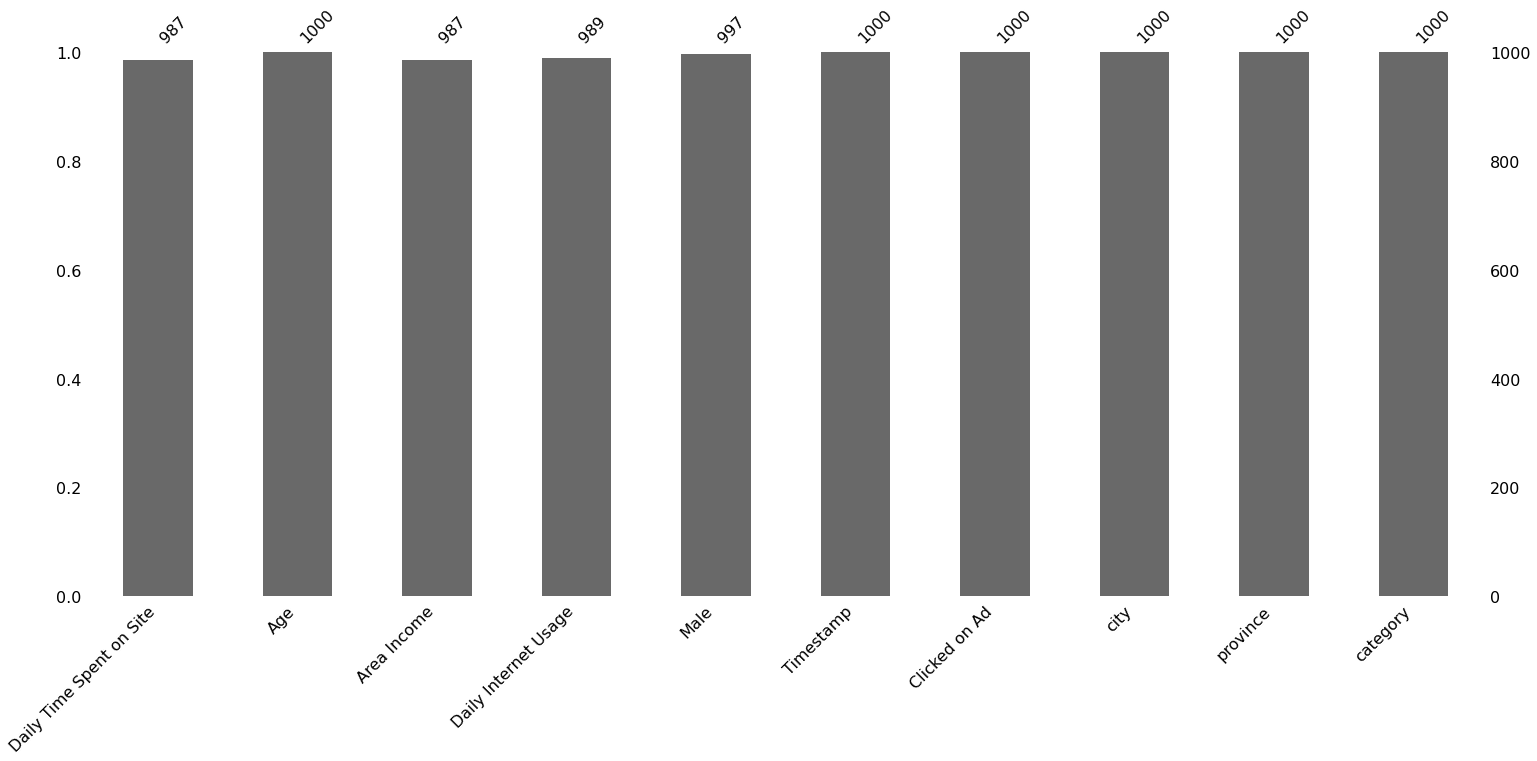

In [312]:
# VISUALIZE MISSING VALUE
msno.bar(dataset)

In [313]:
data_num = dataset.select_dtypes("number")
data_cat = dataset.select_dtypes("object")

In [314]:
des_num = data_num.describe().T
des_num 

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [315]:
for idx in des_num.index: 
  if des_num.loc[idx, '50%'] < des_num.loc[idx, 'mean']:
    print("{} distribution is positive skew".format(idx))
  else:
    print("{} distribution is negative skew".format(idx))

Daily Time Spent on Site distribution is negative skew
Age distribution is positive skew
Area Income distribution is negative skew
Daily Internet Usage distribution is negative skew


In [316]:
des_cat = data_cat.describe()
des_cat

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


1. Daily Time Spent on Site


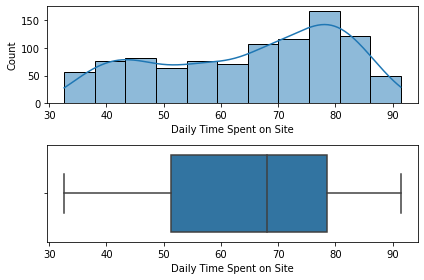

Skew test SkewtestResult(statistic=nan, pvalue=nan)
Skew : nan
count    987.000000
mean      64.929524
std       15.844699
min       32.600000
25%       51.270000
50%       68.110000
75%       78.460000
max       91.430000
Name: Daily Time Spent on Site, dtype: float64
Total outlier : 0
Outlier : []
Maximum value exclude outlier : nan
Minimum value wxclude outlier : nan
2. Age


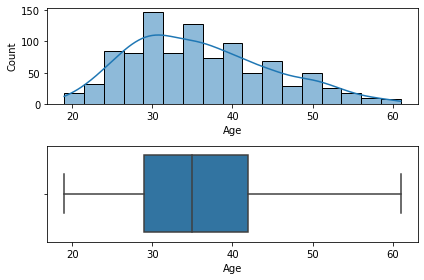

Skew test SkewtestResult(statistic=5.9177696204757595, pvalue=3.263366273765678e-09)
Skew : 0.47842267620660783
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64
Total outlier : 890
Outlier : [35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 37, 48, 24, 33, 23, 37, 41, 36, 40, 30, 35, 36, 41, 28, 28, 34, 22, 35, 28, 23, 30, 39, 46, 39, 29, 30, 32, 31, 25, 20, 43, 37, 46, 23, 28, 45, 47, 31, 36, 29, 41, 27, 34, 29, 32, 45, 29, 40, 32, 25, 34, 31, 46, 39, 43, 42, 22, 35, 33, 38, 45, 27, 28, 38, 31, 41, 36, 34, 34, 37, 43, 24, 26, 40, 31, 26, 36, 41, 46, 34, 23, 40, 21, 20, 40, 25, 42, 30, 32, 22, 46, 32, 31, 42, 45, 31, 26, 27, 36, 43, 31, 44, 45, 27, 37, 36, 36, 29, 47, 39, 36, 38, 23, 38, 31, 30, 44, 44, 41, 44, 41, 46, 25, 35, 48, 33, 27, 38, 36, 28, 27, 36, 35, 33, 31, 24, 32, 31, 42, 34, 47, 31, 26, 48, 35, 44, 22, 31, 34, 38, 27, 41, 29, 31, 30, 36,

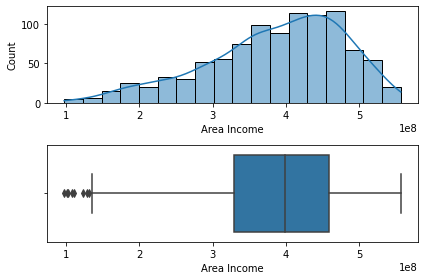

Skew test SkewtestResult(statistic=nan, pvalue=nan)
Skew : nan
count    9.870000e+02
mean     3.848647e+08
std      9.407999e+07
min      9.797550e+07
25%      3.286330e+08
50%      3.990683e+08
75%      4.583554e+08
max      5.563936e+08
Name: Area Income, dtype: float64
Total outlier : 0
Outlier : []
Maximum value exclude outlier : nan
Minimum value wxclude outlier : nan
4. Daily Internet Usage


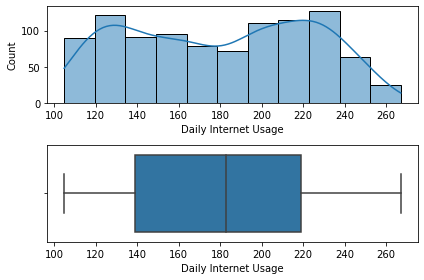

Skew test SkewtestResult(statistic=nan, pvalue=nan)
Skew : nan
count    989.000000
mean     179.863620
std       43.870142
min      104.780000
25%      138.710000
50%      182.650000
75%      218.790000
max      267.010000
Name: Daily Internet Usage, dtype: float64
Total outlier : 0
Outlier : []
Maximum value exclude outlier : nan
Minimum value wxclude outlier : nan


In [317]:
# UNIVARIATE - NUMERIC
a = 1 
for col in data_num.columns:
  print("{}. {}".format(a, col))
  fig, axes = plt.subplots(2, 1)
  sns.histplot(data = data_num[col], kde= True, ax = axes[0])
  sns.boxplot(data = data_num, x= col, ax = axes[1])
  plt.tight_layout()
  plt.show()
  a += 1

  print("Skew test {}".format(skewtest(data_num[col])))
  print("Skew : {}".format(skew(data_num[col])))
  print(data_num[col].describe())

  q3 = np.percentile(data_num[col], 75)
  q1 = np.percentile(data_num[col], 23)
  IQR = q3 - q1 
  upper_fence = q3 + 1.5*IQR
  lower_fence = q1 + 1.5*IQR
  outlier = list(data_num[(data_num[col] < lower_fence) | (data_num[col] > upper_fence)][col])
  lower_whisker = np.min(data_num[data_num[col] >= lower_fence][col])
  upper_whisker = np.max(data_num[data_num[col] <= upper_fence][col])

  print("Total outlier : {}".format(len(outlier)))
  print("Outlier : {}".format(outlier))
  print("Maximum value exclude outlier : {}".format(upper_whisker))
  print("Minimum value wxclude outlier : {}".format(lower_whisker))

1. Male


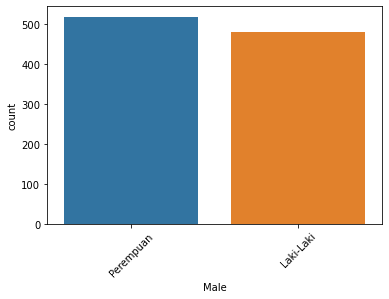

Total unique value : 3
Unique value : {} ['Perempuan' 'Laki-Laki' nan]
Unique value count :
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
2. Timestamp


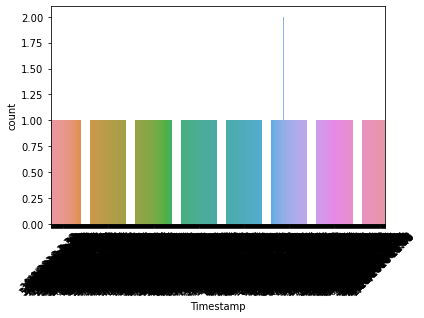

Total unique value : 997
Unique value : {} ['3/27/2016 0:53' '4/4/2016 1:39' '3/13/2016 20:35' '1/10/2016 2:31'
 '6/3/2016 3:36' '5/19/2016 14:30' '1/28/2016 20:59' '3/7/2016 1:40'
 '4/18/2016 9:33' '7/11/2016 1:42' '3/16/2016 20:19' '5/8/2016 8:10'
 '6/3/2016 1:14' '4/20/2016 21:49' '3/24/2016 9:31' '3/9/2016 3:41'
 '1/30/2016 19:20' '5/2/2016 7:00' '2/13/2016 7:53' '2/27/2016 4:43'
 '1/5/2016 7:52' '3/18/2016 13:22' '5/20/2016 8:49' '3/23/2016 9:43'
 '6/13/2016 17:27' '5/27/2016 15:25' '2/8/2016 10:46' '7/19/2016 8:32'
 '4/14/2016 5:08' '1/27/2016 12:38' '7/2/2016 20:23' '3/1/2016 22:13'
 '7/15/2016 5:05' '1/14/2016 14:00' '3/15/2016 3:12' '4/12/2016 3:26'
 '4/7/2016 15:18' '2/9/2016 5:28' '5/7/2016 17:11' '3/11/2016 6:49'
 '4/27/2016 9:27' '4/16/2016 11:53' '5/8/2016 15:38' '2/8/2016 0:23'
 '2/11/2016 13:26' '2/17/2016 13:16' '2/26/2016 22:46' '6/8/2016 18:54'
 '1/8/2016 9:32' '4/25/2016 11:01' '4/4/2016 7:07' '5/3/2016 21:19'
 '1/17/2016 9:31' '3/2/2016 4:57' '2/14/2016 7:36' '4/7/

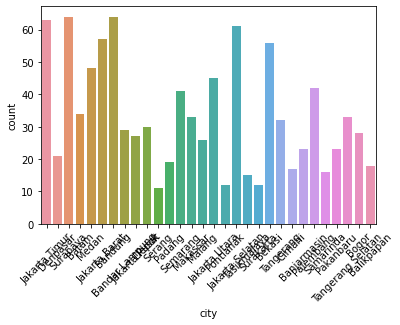

Total unique value : 30
Unique value : {} ['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan']
Unique value count :
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan     

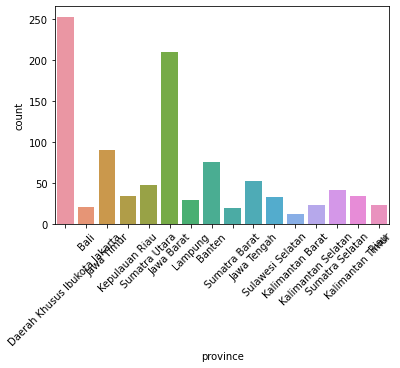

Total unique value : 16
Unique value : {} ['Daerah Khusus Ibukota Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau'
 'Sumatra Utara' 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat'
 'Jawa Tengah' 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau']
Unique value count :
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara                     48
Sumatra Selatan                   42
Kepulauan Riau                    34
Kalimantan Timur                  34
Sulawesi Selatan                  33
Lampung                           29
Kalimantan Selatan                23
Riau                              23
Bali                              21
Sumatra Barat                     19
Kalimantan Barat                  12
Name: province, dtype: int64
5. category


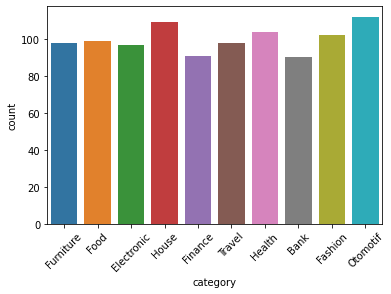

Total unique value : 10
Unique value : {} ['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']
Unique value count :
Otomotif      112
House         109
Health        104
Fashion       102
Food           99
Furniture      98
Travel         98
Electronic     97
Finance        91
Bank           90
Name: category, dtype: int64


In [318]:
# UNIVARIATE - CATEGORY 
a = 1
for col in data_cat.drop("Clicked on Ad", axis = 1).columns:
  print("{}. {}".format(a, col))
  sns.countplot(data = data_cat, x = col)
  plt.xticks(rotation= 45)
  plt.show()

  print("Total unique value : {}".format(len(data_cat[col].unique())))
  print("Unique value : {}", format(data_cat[col].unique()))
  print("Unique value count :")
  print(data_cat[col].value_counts())

  a += 1

1. Daily Time Spent on Site


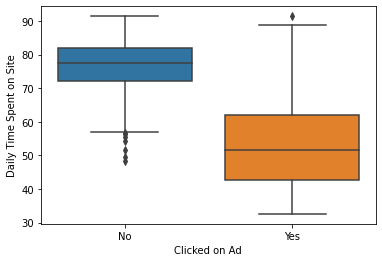

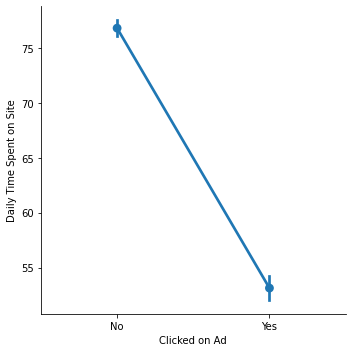


----------------------------------------------------------------------------------------------------
2. Age


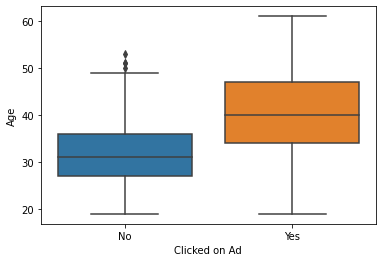

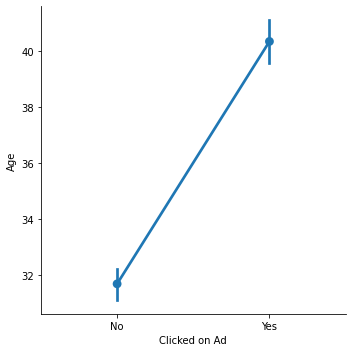


----------------------------------------------------------------------------------------------------
3. Area Income


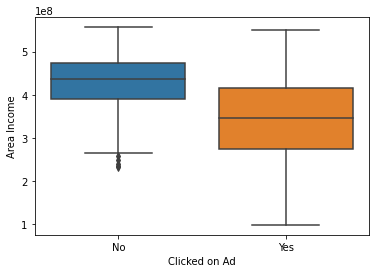

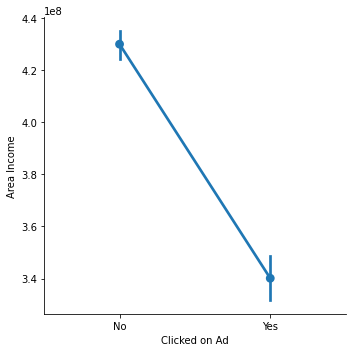


----------------------------------------------------------------------------------------------------
4. Daily Internet Usage


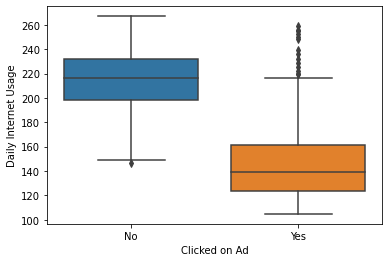

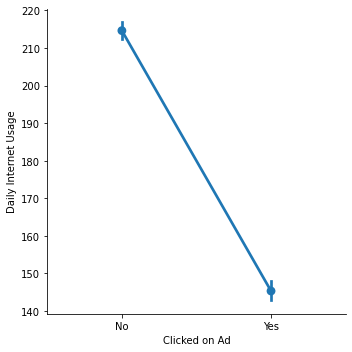


----------------------------------------------------------------------------------------------------


In [319]:
# BIVARIATE NUM-LABEL 
a = 1
for col in data_num.columns:
    print("{}. {}".format(a, col))
    sns.boxplot(x = 'Clicked on Ad', y = col, data = dataset)
    plt.show()
    sns.catplot(x = 'Clicked on Ad', y = col, data = dataset, kind='point')
    plt.show()

    print()
    print('-'*100)
    a += 1

1. Male


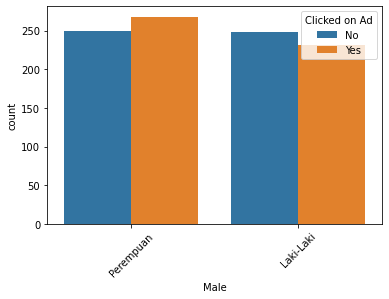

----------------------------------------------------------------------------------------------------

2. Timestamp


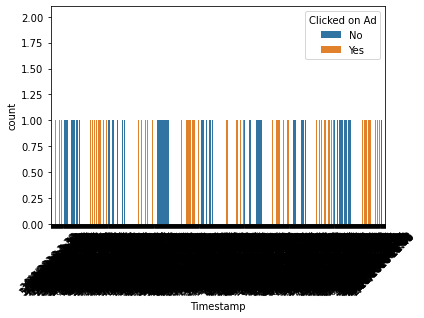

----------------------------------------------------------------------------------------------------

3. Clicked on Ad


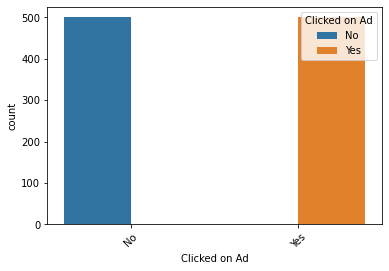

----------------------------------------------------------------------------------------------------

4. city


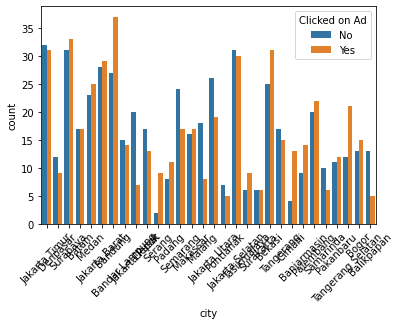

----------------------------------------------------------------------------------------------------

5. province


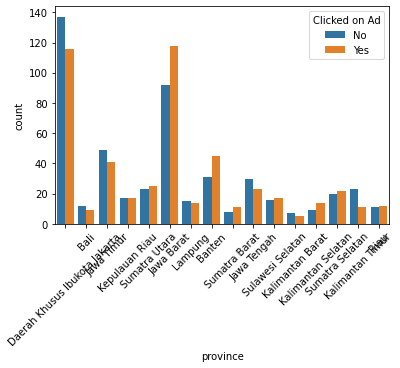

----------------------------------------------------------------------------------------------------

6. category


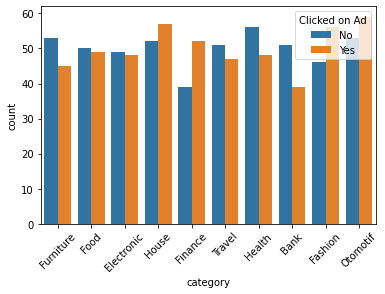

----------------------------------------------------------------------------------------------------



In [320]:
# BIVARIATE CAT-LABEL 
a = 1
for i in data_cat.columns: 
  print("{}. {}".format(a, i))
  sns.countplot(data = dataset, x= i, hue = "Clicked on Ad")
  plt.xticks(rotation = 45)
  plt.show()
  print('-'*100)
  print()
  a+=1

1. Daily Time Spent on Site


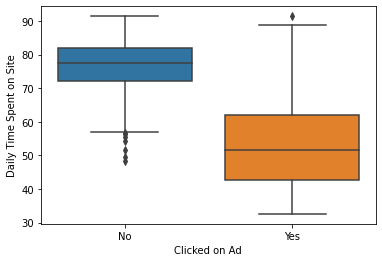

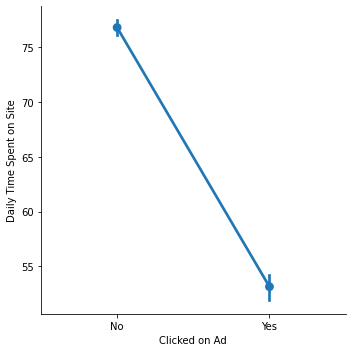

----------------------------------------------------------------------------------------------------
2. Age


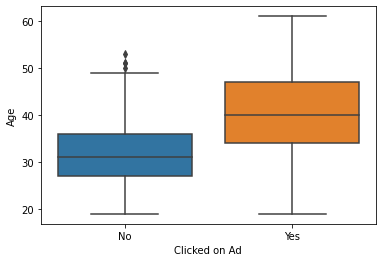

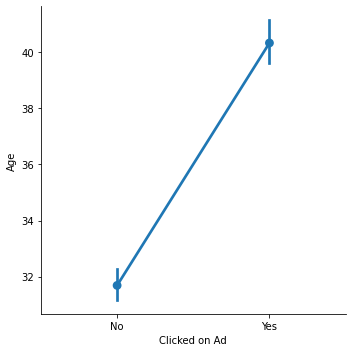

----------------------------------------------------------------------------------------------------
3. Daily Internet Usage


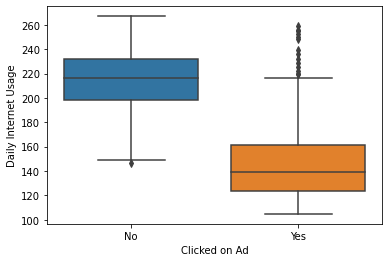

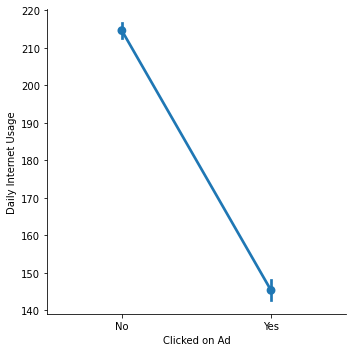

----------------------------------------------------------------------------------------------------


In [321]:
# MULTIVARIATE BETWEEN AGE, DAILY INTERNET USAGE, DAILY TIME SPENT ON SITE AND LABEL
biv_an = dataset[["Daily Time Spent on Site", "Age", "Daily Internet Usage"]]
a = 1
for i in biv_an.columns:
  print("{}. {}".format(a, i))
  sns.boxplot(data = dataset, y= i, x = "Clicked on Ad")
  plt.show()
  sns.catplot(data = dataset, y= i, x= "Clicked on Ad", kind= 'point')
  plt.show()
  print("-"*100)
  a+=1

<AxesSubplot:>

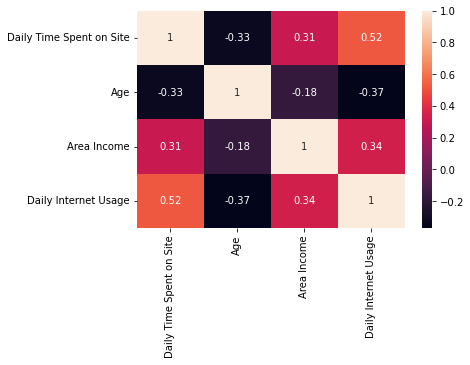

In [322]:
corr = dataset.corr()
sns.heatmap(corr, annot= True)

In [323]:
thrs = 0.5
couple = []
for idx in corr.index:
  for col in corr.columns:
    if idx != col:
      if [col, idx] not in couple:
        couple.append([idx, col])
        if np.abs(corr.loc[idx, col]) > thrs:
          print("Correlaton between {} and {} is {}".format(idx, col, round(corr.loc[idx, col], 2)))
          

Correlaton between Daily Time Spent on Site and Daily Internet Usage is 0.52


Only Daily Time Spent on Site and Dily Internet Usage have correlation above 0.5

# DATA PREPROCESSING

1. Mengubah range `Age` menjadi teen age (17 - 25), mid_age (26 - 45), eldery (46 - 65)

2. extract daterime from `Timestamp`

3. mengubah kolom name `Male` menjadi Gender

In [324]:
# Age 
Age = []
for index, row in dataset.iterrows():
  if (row["Age"] >= 17) & (row["Age"] <= 25):
    Age.append("Teen age")
  elif (row["Age"] >= 26) & (row["Age"] <= 45):
    Age.append("Mid Age")
  else:
    Age.append("Eldery")

dataset["Age"] = Age

In [325]:
# timestamp 
dataset["Timestamp"] = [d.weekday() for d in pd.to_datetime(dataset["Timestamp"])]
dataset["Timestamp"] = dataset["Timestamp"].apply(lambda x: 1 if x <= 5 else 0)

In [326]:
# rename 
dataset.rename(columns = {"Male" : "Gender"}, inplace = True)
dataset.rename(columns= {"Timestamp" : "is_weekday"}, inplace = True)
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,is_weekday,Clicked on Ad,city,province,category
0,68.95,Mid Age,432837300.0,256.09,Perempuan,0,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,Mid Age,479092950.0,193.77,Laki-Laki,1,No,Denpasar,Bali,Food
2,69.47,Mid Age,418501580.0,236.50,Perempuan,0,No,Surabaya,Jawa Timur,Electronic
3,74.15,Mid Age,383643260.0,245.89,Laki-Laki,0,No,Batam,Kepulauan Riau,House
4,68.37,Mid Age,517229930.0,225.58,Perempuan,1,No,Medan,Sumatra Utara,Finance


In [327]:
# handle duplicate
dataset.duplicated().sum()

0

we dont have any duplicate column

In [328]:
# handle missing value, drop karena jumlah missing value < 10%
dataset.dropna(inplace= True)

In [329]:
dataset.shape

(963, 10)

# SCALING AND ENCODING

In [330]:
# encoding data with pd.get_dummies 
num = dataset.select_dtypes("number")
cat = dataset.select_dtypes("object").drop("Clicked on Ad", axis = 1)

In [331]:
enc_age = pd.get_dummies(dataset["Age"], drop_first = True, prefix = 'age')
enc_gender = pd.get_dummies(dataset["Gender"], drop_first = True, prefix= 'gender')
enc_city = pd.get_dummies(dataset["city"], drop_first = True, prefix = 'city')
enc_province = pd.get_dummies(dataset["province"], drop_first = True, prefix = 'pr')
enc_category = pd.get_dummies(dataset["category"], drop_first = True, prefix = 'cat')

In [332]:
data_enc = num.join([enc_age, enc_gender, enc_city, enc_province, enc_category])
data_enc.shape

(963, 60)

In [333]:
# split data 
X = data_enc
y = dataset["Clicked on Ad"].apply(lambda x: 1 if x == "Yes" else 0)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 42)

In [335]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(770, 60) (770,)
(193, 60) (193,)


In [336]:
data_test = dataset.loc[X_test.index]

Train set

In [337]:
train_num = X_train.iloc[:, :3]
train_notscale = X_train.drop(train_num, axis = 1).reset_index(drop= True)

In [338]:
# scaling train set 
ss = StandardScaler()
train_sc = pd.DataFrame(ss.fit_transform(train_num), columns = ss.feature_names_in_)
train_concat = pd.concat([train_sc, train_notscale], axis = 1)
print(train_concat.shape, y_train.shape)

(770, 60) (770,)


Test set

In [339]:
test_num = X_test.iloc[:, :3].reset_index(drop= True)
test_notscale = X_test.drop(test_num, axis = 1).reset_index(drop= True)

In [340]:
# scaling test set 
test_sc = pd.DataFrame(ss.transform(test_num), columns= test_num.columns)
test_concat = pd.concat([test_sc, test_notscale], axis = 1)
print(test_concat.shape, y_test.shape)

(193, 60) (193,)


In [341]:
test_concat.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,is_weekday,age_Mid Age,age_Teen age,gender_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,pr_Sumatra Utara,cat_Electronic,cat_Fashion,cat_Finance,cat_Food,cat_Furniture,cat_Health,cat_House,cat_Otomotif,cat_Travel
0,-1.272018,0.610691,-0.986195,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.241704,0.361847,1.070735,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.694891,-2.186199,-1.257535,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.186139,0.699973,0.931149,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.719512,1.413779,0.351385,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# MODELING

With normalization/standardization

In [342]:
train_concat.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,is_weekday,age_Mid Age,age_Teen age,gender_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,pr_Sumatra Utara,cat_Electronic,cat_Fashion,cat_Finance,cat_Food,cat_Furniture,cat_Health,cat_House,cat_Otomotif,cat_Travel
0,-1.280858,0.047546,-1.221832,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.410296,0.588204,0.091563,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.666477,1.267337,-0.904885,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.474517,1.144744,1.153657,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.029990,0.858688,1.549150,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [343]:
test_concat.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,is_weekday,age_Mid Age,age_Teen age,gender_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,pr_Sumatra Utara,cat_Electronic,cat_Fashion,cat_Finance,cat_Food,cat_Furniture,cat_Health,cat_House,cat_Otomotif,cat_Travel
0,-1.272018,0.610691,-0.986195,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.241704,0.361847,1.070735,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.694891,-2.186199,-1.257535,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.186139,0.699973,0.931149,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.719512,1.413779,0.351385,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


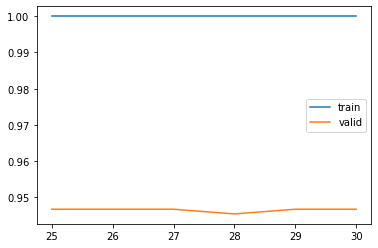

In [344]:
# tunning + with scaling
rf = RandomForestClassifier()
n_estimator = np.arange(25, 31, 1)
train = []
valid = []
a = []
for x in n_estimator:
    result = cross_validate(RandomForestClassifier(n_estimators= x, random_state= 42),
    train_concat,
    y_train,
    cv= 5,
    return_train_score= True)

    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= 'train')
sns.lineplot(x= a, y= valid, label= 'valid')
plt.show()

n_estimator = 29

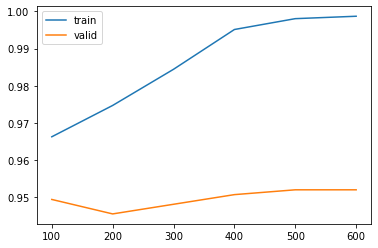

In [345]:
max_samples = np.arange(100,700,100)
train = []
valid = []
a = []
for x in max_samples:
    result = cross_validate(RandomForestClassifier(n_estimators=24,
                                                  max_samples=x, 
                                                  random_state= 42),
                            train_concat,
                            y_train,
                            cv=5,
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

max_samples = 500

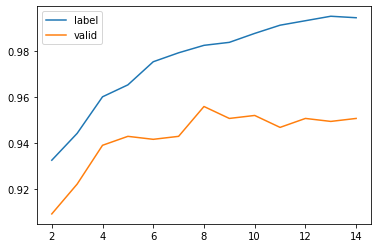

In [346]:
max_depth = np.arange(2, 15, 1)
train = []
valid = []
a = []

for x in max_depth:
    result = cross_validate(RandomForestClassifier(n_estimators= 24,
                                                    max_samples= 500, 
                                                    max_depth= x, 
                                                    random_state = 42),
                            train_concat,
                            y_train,
                            cv= 5,
                            return_train_score= True)

    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= "label")
sns.lineplot(x= a, y= valid, label= "valid")
plt.show()

max_ depth = 8

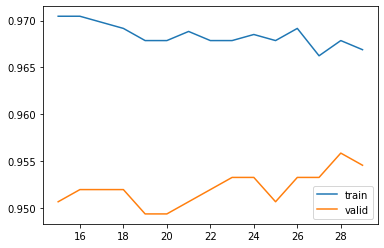

In [347]:
min_sample_split = np.arange(15, 30, 1)
train = []
valid = []
a = []

for x in min_sample_split:
    result= cross_validate(RandomForestClassifier(n_estimators=24,
                                                    max_samples= 500,
                                                    max_depth= 8,
                                                    min_samples_split= x,
                                                    random_state= 42),
                            train_concat,
                            y_train,
                            cv= 5,
                            return_train_score= True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
    plt.show()

sns.lineplot(x= a, y=train, label= "train")
sns.lineplot(x= a, y= valid, label= "valid")
plt.show()

min_sample_split = 28

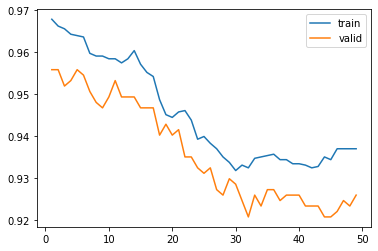

In [348]:
min_sample_leaf = np.arange(1, 50, 1)
train = []
valid = []
a = []

for x in min_sample_leaf:
    result = cross_validate(RandomForestClassifier(n_estimators= 24,
                                                    max_samples= 500,
                                                    max_depth= 8,
                                                    min_samples_split= 28,
                                                    min_samples_leaf= x,
                                                    random_state= 42),
                            train_concat,
                            y_train,
                            cv= 5,
                            return_train_score = True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
sns.lineplot(x= a, y= train, label = 'train')
sns.lineplot(x= a, y= valid, label = 'valid')
plt.show()

min_sample_leaf = default

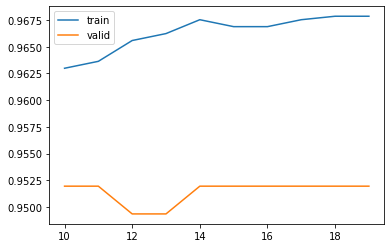

In [349]:
max_leaf_nodes = np.arange(10, 20, 1)
train = []
valid = []
a = []

for x in max_leaf_nodes:
    result = cross_validate(RandomForestClassifier(n_estimators= 24,
                                                    max_samples= 500,
                                                    max_depth= 8,
                                                    min_samples_split= 28,
                                                    max_leaf_nodes= x,
                                                    random_state= 42),
                            train_concat,
                            y_train,
                            cv= 5,
                            return_train_score = True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
sns.lineplot(x= a, y= train, label = 'train')
sns.lineplot(x= a, y= valid, label = 'valid')
plt.show()

max_leaf_nodes = 14

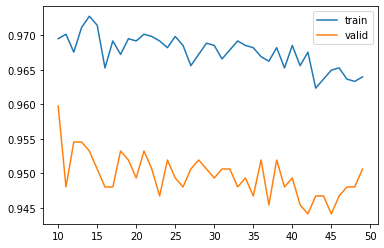

In [350]:
max_features = np.arange(10, 50, 1)
train = []
valid = []
a = []
for x in max_features:
    result = cross_validate(RandomForestClassifier(n_estimators= 24,
                                                    max_samples= 500,
                                                    max_depth= 8,
                                                    min_samples_split= 28,
                                                    max_leaf_nodes= 14,
                                                    max_features= x,
                                                    random_state= 42),
                            train_concat,
                            y_train,
                            cv= 5,
                            return_train_score= True)

    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= "train")
sns.lineplot(x =a, y= valid, label = "valid")
plt.show()

max_feature = default

In [351]:
rf_norm = RandomForestClassifier(n_estimators= 24,
                                 max_samples= 500,
                                 max_depth= 8,
                                 min_samples_split= 28,
                                 max_leaf_nodes= 14,
                                 random_state= 42)
rf_norm.fit(train_concat, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=14, max_samples=500,
                       min_samples_split=28, n_estimators=24, random_state=42)

In [352]:
feature_importance_norm = pd.DataFrame(rf_norm.feature_importances_, index= train_concat.columns, 
                                        columns= ['importance']).sort_values('importance', ascending= False)

feature_importance_norm.iloc[:15, :]

,importance
Daily Internet Usage,0.502081
Daily Time Spent on Site,0.271703
Area Income,0.128302
age_Teen age,0.017342
age_Mid Age,0.012431
city_Jakarta Pusat,0.003897
city_Surabaya,0.003460
cat_Finance,0.003350
city_Tasikmalaya,0.003101
cat_Furniture,0.002867


Without normalization/standarization

In [353]:
train_concat_noscl = pd.concat([train_num.reset_index(drop= "True"), train_notscale], axis = 1)
train_concat_noscl.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,is_weekday,age_Mid Age,age_Teen age,gender_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,pr_Sumatra Utara,cat_Electronic,cat_Fashion,cat_Finance,cat_Food,cat_Furniture,cat_Health,cat_House,cat_Otomotif,cat_Travel
0,44.64,390513060.0,127.01,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,87.26,441423850.0,184.03,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,54.37,505374030.0,140.77,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,72.44,493830120.0,230.14,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,65.40,466893840.0,247.31,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [354]:
test_concat_noscl = pd.concat([test_num, test_notscale], axis = 1)
test_concat_noscl.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,is_weekday,age_Mid Age,age_Teen age,gender_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,pr_Sumatra Utara,cat_Electronic,cat_Fashion,cat_Finance,cat_Food,cat_Furniture,cat_Health,cat_House,cat_Otomotif,cat_Travel
0,44.78,443541280.0,137.24,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,84.59,420108990.0,226.54,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,53.92,180173630.0,125.46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,83.71,451948490.0,220.48,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,76.32,519163680.0,195.31,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


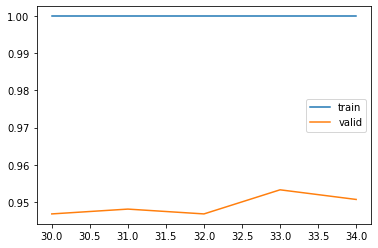

In [355]:
n_estimator = np.arange(30, 35, 1)
train = []
valid = []
a = []
for x in n_estimator:
    result = cross_validate(RandomForestClassifier(n_estimators= x, random_state= 42),
    train_concat_noscl,
    y_train,
    cv= 5,
    return_train_score= True)

    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= 'train')
sns.lineplot(x= a, y= valid, label= 'valid')
plt.show()

n_estimator = 33

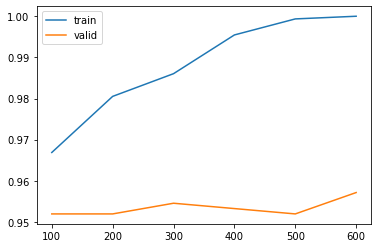

In [356]:
max_samples = np.arange(100,700,100)
train = []
valid = []
a = []
for x in max_samples:
    result = cross_validate(RandomForestClassifier(n_estimators=33,
                                                  max_samples=x, 
                                                  random_state= 42),
                            train_concat_noscl,
                            y_train,
                            cv=5,
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

max_sample = 600

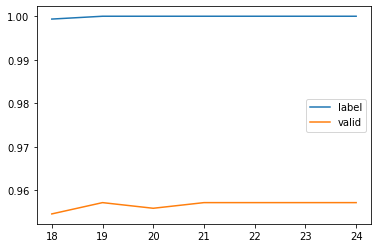

In [357]:
max_depth = np.arange(18, 25, 1)
train = []
valid = []
a = []

for x in max_depth:
    result = cross_validate(RandomForestClassifier(n_estimators= 33,
                                                    max_samples= 600, 
                                                    max_depth= x, 
                                                    random_state = 42),
                            train_concat_noscl,
                            y_train,
                            cv= 5,
                            return_train_score= True)

    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= "label")
sns.lineplot(x= a, y= valid, label= "valid")
plt.show()

max_depth = 19

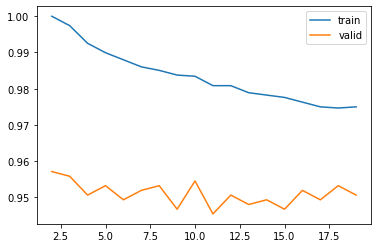

In [358]:
min_sample_split = np.arange(2, 20, 1)
train = []
valid = []
a = []

for x in min_sample_split:
    result= cross_validate(RandomForestClassifier(n_estimators=33,
                                                    max_samples= 600,
                                                    max_depth= 19,
                                                    min_samples_split= x,
                                                    random_state= 42),
                            train_concat_noscl,
                            y_train,
                            cv= 5,
                            return_train_score= True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
    plt.show()

sns.lineplot(x= a, y=train, label= "train")
sns.lineplot(x= a, y= valid, label= "valid")
plt.show()

min_sample_split = defaut

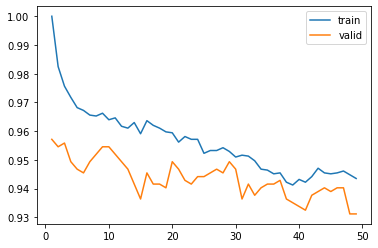

In [359]:
min_sample_leaf = np.arange(1, 50, 1)
train = []
valid = []
a = []

for x in min_sample_leaf:
    result = cross_validate(RandomForestClassifier(n_estimators= 33,
                                                    max_samples= 600,
                                                    max_depth= 19,
                                                    min_samples_leaf= x,
                                                    random_state= 42),
                            train_concat_noscl,
                            y_train,
                            cv= 5,
                            return_train_score = True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
sns.lineplot(x= a, y= train, label = 'train')
sns.lineplot(x= a, y= valid, label = 'valid')
plt.show()

min_sample_leaf = default


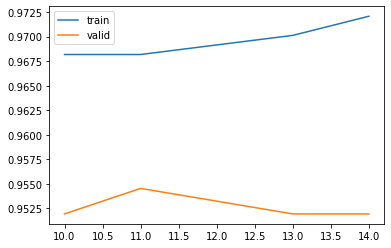

In [360]:
max_leaf_nodes = np.arange(10, 15, 1)
train = []
valid = []
a = []

for x in max_leaf_nodes:
    result = cross_validate(RandomForestClassifier(n_estimators= 33,
                                                    max_samples= 600,
                                                    max_depth= 19,
                                                    max_leaf_nodes= x,
                                                    random_state= 42),
                            train_concat_noscl,
                            y_train,
                            cv= 5,
                            return_train_score = True)
    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)
sns.lineplot(x= a, y= train, label = 'train')
sns.lineplot(x= a, y= valid, label = 'valid')
plt.show()

max_leaf_node = 11

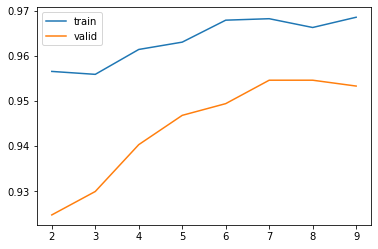

In [361]:
max_features = np.arange(2, 10, 1)
train = []
valid = []
a = []
for x in max_features:
    result = cross_validate(RandomForestClassifier(n_estimators= 33,
                                                    max_samples= 600,
                                                    max_depth= 19,
                                                    max_leaf_nodes= 11,
                                                    max_features= x,
                                                    random_state= 42),
                            train_concat_noscl,
                            y_train,
                            cv= 5,
                            return_train_score= True)

    train.append(result["train_score"].mean())
    valid.append(result["test_score"].mean())
    a.append(x)

sns.lineplot(x= a, y= train, label= "train")
sns.lineplot(x =a, y= valid, label = "valid")
plt.show()

max_features = 7

In [362]:
rf_notnorm = RandomForestClassifier(n_estimators= 33,
                                    max_samples= 600,
                                    max_depth= 19,
                                    max_leaf_nodes= 11,
                                    max_features= 7,
                                    random_state= 42)
rf_notnorm.fit(train_concat_noscl, y_train)

RandomForestClassifier(max_depth=19, max_features=7, max_leaf_nodes=11,
                       max_samples=600, n_estimators=33, random_state=42)

In [363]:
feature_importance_notnorm = pd.DataFrame(rf_notnorm.feature_importances_, index= train_concat_noscl.columns, 
                                            columns= ["importance"]).sort_values('importance', ascending= False)
feature_importance_notnorm.iloc[:15, :]

,importance
Daily Internet Usage,0.462601
Daily Time Spent on Site,0.349468
Area Income,0.080573
age_Teen age,0.020475
age_Mid Age,0.013812
pr_Kalimantan Timur,0.008500
pr_Jawa Barat,0.004373
gender_Perempuan,0.004219
city_Jakarta Barat,0.003867
city_Jakarta Pusat,0.003644


# Compairing the result

MODEL WITH MORMALIZE DATA

In [364]:
# model with normalize data
rf_norm_def = RandomForestClassifier()
rf_norm_def.fit(train_concat, y_train)
logreg_norm_def = LogisticRegression()
logreg_norm_def.fit(train_concat, y_train)
xgb_norm_def = GradientBoostingClassifier()
xgb_norm_def.fit(train_concat, y_train)
ada_norm_def = AdaBoostClassifier()
ada_norm_def.fit(train_concat, y_train)


AdaBoostClassifier()

In [365]:
merg([result_met(rf_norm_def, train_concat, y_train, 'rf_def_train'),
    result_met(rf_norm_def, test_concat, y_test, 'rf_def_test'),
    result_met(rf_norm, train_concat, y_train, 'rf_opt_train'),
    result_met(rf_norm, test_concat, y_test, 'rf_opt_test'),
    result_met(logreg_norm_def, train_concat, y_train, 'logreg_def_train'),
    result_met(logreg_norm_def, test_concat, y_test, 'logreg_def_test'),
    result_met(xgb_norm_def, train_concat, y_train, 'xgb_def_train'),
    result_met(xgb_norm_def, test_concat, y_test, 'xgb_def_test'),
    result_met(ada_norm_def, train_concat, y_train, 'ada_def_train'),
    result_met(ada_norm_def, test_concat, y_test, 'ada_def_test')
    ])

,precision,recall,f1_score,accuracy,npv,tnr,fpr
rf_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
rf_def_test,0.9604,1.0000,0.9798,0.9793,1.0000,0.9583,0.0417
rf_opt_train,0.9588,0.9588,0.9588,0.9584,0.9581,0.9581,0.0419
rf_opt_test,0.9320,0.9897,0.9600,0.9585,0.9889,0.9271,0.0729
logreg_def_train,0.9867,0.9588,0.9725,0.9727,0.9593,0.9869,0.0131
logreg_def_test,0.9320,0.9897,0.9600,0.9585,0.9889,0.9271,0.0729
xgb_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
xgb_def_test,0.9412,0.9897,0.9648,0.9637,0.9890,0.9375,0.0625
ada_def_train,1.0000,0.9691,0.9843,0.9844,0.9695,1.0000,0.0000
ada_def_test,0.9238,1.0000,0.9604,0.9585,1.0000,0.9167,0.0833


MODEL WITHOUT NORMALIZE DATA

In [366]:
# model without normalize data
rf_notnorm_def = RandomForestClassifier()
rf_notnorm_def.fit(train_concat_noscl, y_train)
logreg_notnorm_def = LogisticRegression()
logreg_notnorm_def.fit(train_concat_noscl, y_train)
xgb_notnorm_def = GradientBoostingClassifier()
xgb_notnorm_def.fit(train_concat_noscl, y_train)
ada_notnorm_def = AdaBoostClassifier()
ada_notnorm_def.fit(train_concat_noscl, y_train)

AdaBoostClassifier()

In [367]:
merg([result_met(rf_notnorm_def, train_concat_noscl, y_train, 'rf_def_train'),
    result_met(rf_notnorm_def, test_concat_noscl, y_test, 'rf_def_test'),
    result_met(rf_notnorm, train_concat_noscl, y_train, 'rf_opt_train'),
    result_met(rf_notnorm, test_concat_noscl, y_test, 'rf_opt_test'),
    result_met(logreg_notnorm_def, train_concat_noscl, y_train, 'logreg_def_train'),
    result_met(logreg_notnorm_def, test_concat_noscl, y_test, 'logreg_def_test'),
    result_met(xgb_notnorm_def, train_concat_noscl, y_train, 'xgb_def_train'),
    result_met(xgb_notnorm_def, test_concat_noscl, y_test, 'xgb_def_test'),
    result_met(ada_notnorm_def, train_concat_noscl, y_train, 'ada_def_train'),
    result_met(ada_notnorm_def, test_concat_noscl, y_test, 'ada_def_test'),
    ])

,precision,recall,f1_score,accuracy,npv,tnr,fpr
rf_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
rf_def_test,0.9412,0.9897,0.9648,0.9637,0.9890,0.9375,0.0625
rf_opt_train,0.9588,0.9588,0.9588,0.9584,0.9581,0.9581,0.0419
rf_opt_test,0.9320,0.9897,0.9600,0.9585,0.9889,0.9271,0.0729
logreg_def_train,0.0000,0.0000,0.0000,0.4961,0.4961,1.0000,0.0000
logreg_def_test,0.0000,0.0000,0.0000,0.4974,0.4974,1.0000,0.0000
xgb_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
xgb_def_test,0.9412,0.9897,0.9648,0.9637,0.9890,0.9375,0.0625
ada_def_train,1.0000,0.9691,0.9843,0.9844,0.9695,1.0000,0.0000
ada_def_test,0.9238,1.0000,0.9604,0.9585,1.0000,0.9167,0.0833


Dari tabel diatas dapat disimpulkan:
1. Dipilih model yang dilakukan normalisasi pada data, karena nilai FPR data yang dilakukan normalisasi cenderung lebih kecil dibandingkan data yang tidak dilakukan normalisasi. 
2. Dipilih model random forest yang dilakukan normalisasi. 

In [379]:
merg([result_met(rf_notnorm_def, train_concat_noscl, y_train, 'notnorm_def_train'),
    result_met(rf_notnorm_def, test_concat_noscl, y_test, 'notnorm_def_test'),
    result_met(rf_notnorm, train_concat_noscl, y_train, 'notnorm_opt_train'),
    result_met(rf_notnorm, test_concat_noscl, y_test, 'notnorm_opt_test'),
    result_met(rf_norm_def, train_concat, y_train, 'norm_def_train'),
    result_met(rf_norm_def, test_concat, y_test, 'norm_def_test'),
    result_met(rf_norm, train_concat, y_train, 'norm_opt_train'),
    result_met(rf_norm, test_concat, y_test, 'norm_opt_test')])

,precision,recall,f1_score,accuracy,npv,tnr,fpr
notnorm_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
notnorm_def_test,0.9412,0.9897,0.9648,0.9637,0.9890,0.9375,0.0625
notnorm_opt_train,0.9588,0.9588,0.9588,0.9584,0.9581,0.9581,0.0419
notnorm_opt_test,0.9320,0.9897,0.9600,0.9585,0.9889,0.9271,0.0729
norm_def_train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
norm_def_test,0.9604,1.0000,0.9798,0.9793,1.0000,0.9583,0.0417
norm_opt_train,0.9588,0.9588,0.9588,0.9584,0.9581,0.9581,0.0419
norm_opt_test,0.9320,0.9897,0.9600,0.9585,0.9889,0.9271,0.0729


# Insight from model

In [382]:
y_test.value_counts().sum()

193

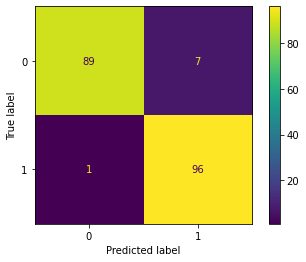

In [369]:
# confusion matrix for random forest with normalize data
final_model = rf_norm
y_true = data_test['Clicked on Ad'].apply(lambda x: 1 if x == 'Yes' else 0)
y_pred = rf_norm.predict(test_concat)
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()
plt.show()

Information about the correctly predicted label (insight from data)

In [370]:
data_test['y_true'] = data_test['Clicked on Ad']
data_test.drop("Clicked on Ad", axis = 1, inplace= True)
data_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,is_weekday,city,province,category,y_true
196,44.78,Mid Age,443541280.0,137.24,Laki-Laki,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Furniture,Yes
21,84.59,Mid Age,420108990.0,226.54,Laki-Laki,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel,No
804,53.92,Mid Age,180173630.0,125.46,Laki-Laki,0,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Bank,Yes
421,83.71,Mid Age,451948490.0,220.48,Laki-Laki,0,Banjarmasin,Kalimantan Selatan,Otomotif,No
160,76.32,Mid Age,519163680.0,195.31,Laki-Laki,1,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Food,No


In [371]:
data_test['y_pred'] = rf_norm.predict(test_concat) # using random forest with normalize data 
data_test['y_pred'] = data_test['y_pred'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [372]:
# var correct_pred is created for True Positive and True Negative 
correct_pred  = data_test[(data_test['y_true'] == data_test['y_pred'])]
correct_pred.shape

(185, 11)

In [373]:
correct_pred['is_weekday'] = correct_pred['is_weekday'].apply(lambda x : "Yes" if x == 1 else "No")

C:\Users\Indah\AppData\Local\Temp/ipykernel_15748/792329062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_pred['is_weekday'] = correct_pred['is_weekday'].apply(lambda x : "Yes" if x == 1 else "No")


In [374]:
nume = correct_pred.select_dtypes('number')
cate = correct_pred.select_dtypes('object').drop(['y_pred', 'y_true'], axis = 1)

1. Daily Time Spent on Site


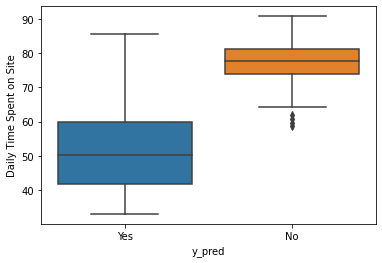

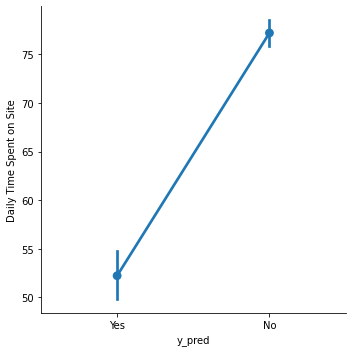


----------------------------------------------------------------------------------------------------
2. Area Income


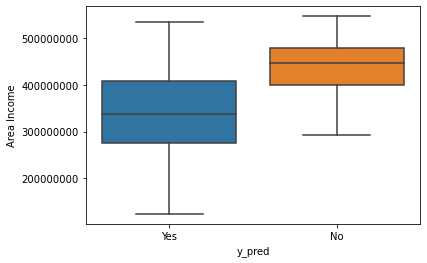

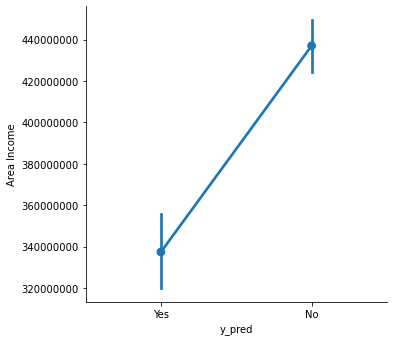


----------------------------------------------------------------------------------------------------
3. Daily Internet Usage


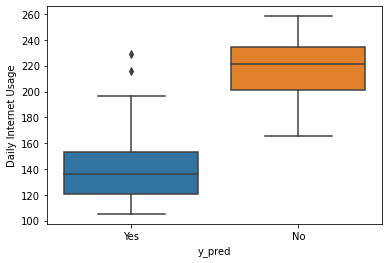

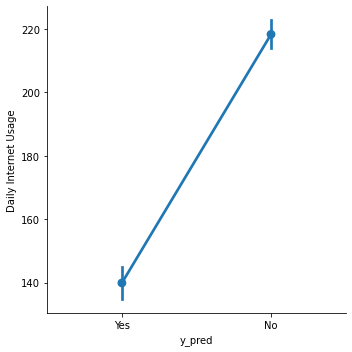


----------------------------------------------------------------------------------------------------


In [375]:
a = 1
for col in nume.columns:
    print("{}. {}".format(a, col))
    sns.boxplot(x = 'y_pred', y = col, data = correct_pred)
    plt.ticklabel_format(style='plain', axis = 'y')
    plt.show()
    sns.catplot(x = 'y_pred', y = col, data = correct_pred, kind='point')
    plt.ticklabel_format(style='plain', axis = 'y')
    plt.show()

    print()
    print('-'*100)
    a += 1

1. Age


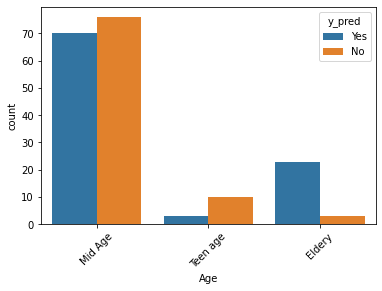

        Age y_pred          %
0    Eldery     No  11.538462
1    Eldery    Yes  88.461538
2   Mid Age     No  52.054795
3   Mid Age    Yes  47.945205
4  Teen age     No  76.923077
5  Teen age    Yes  23.076923
2. Gender


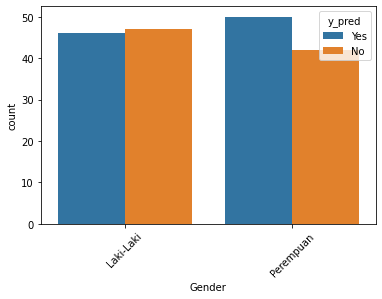

      Gender y_pred          %
0  Laki-Laki     No  50.537634
1  Laki-Laki    Yes  49.462366
2  Perempuan     No  45.652174
3  Perempuan    Yes  54.347826
3. is_weekday


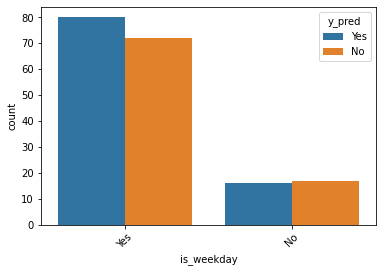

  is_weekday y_pred          %
0         No     No  51.515152
1         No    Yes  48.484848
2        Yes     No  47.368421
3        Yes    Yes  52.631579
4. city


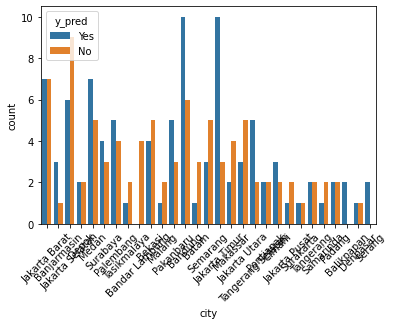

                 city y_pred           %
0          Balikpapan    Yes  100.000000
1      Bandar Lampung     No  100.000000
2             Bandung     No   37.500000
3             Bandung    Yes   62.500000
4         Banjarmasin     No   25.000000
5         Banjarmasin    Yes   75.000000
6               Batam     No   75.000000
7               Batam    Yes   25.000000
8              Bekasi     No   55.555556
9              Bekasi    Yes   44.444444
10             Cimahi     No   40.000000
11             Cimahi    Yes   60.000000
12           Denpasar     No   50.000000
13           Denpasar    Yes   50.000000
14              Depok     No   50.000000
15              Depok    Yes   50.000000
16      Jakarta Barat     No   50.000000
17      Jakarta Barat    Yes   50.000000
18      Jakarta Pusat     No   66.666667
19      Jakarta Pusat    Yes   33.333333
20    Jakarta Selatan     No   60.000000
21    Jakarta Selatan    Yes   40.000000
22      Jakarta Timur     No   23.076923
23      Jakarta 

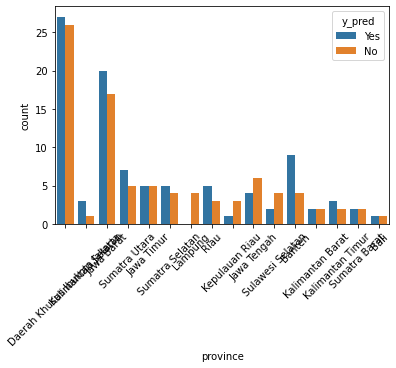

                         province y_pred           %
0                            Bali     No   50.000000
1                            Bali    Yes   50.000000
2                          Banten     No   30.769231
3                          Banten    Yes   69.230769
4   Daerah Khusus Ibukota Jakarta     No   49.056604
5   Daerah Khusus Ibukota Jakarta    Yes   50.943396
6                      Jawa Barat     No   45.945946
7                      Jawa Barat    Yes   54.054054
8                     Jawa Tengah     No   60.000000
9                     Jawa Tengah    Yes   40.000000
10                     Jawa Timur     No   50.000000
11                     Jawa Timur    Yes   50.000000
12               Kalimantan Barat     No   50.000000
13               Kalimantan Barat    Yes   50.000000
14             Kalimantan Selatan     No   25.000000
15             Kalimantan Selatan    Yes   75.000000
16               Kalimantan Timur     No   40.000000
17               Kalimantan Timur    Yes   60.

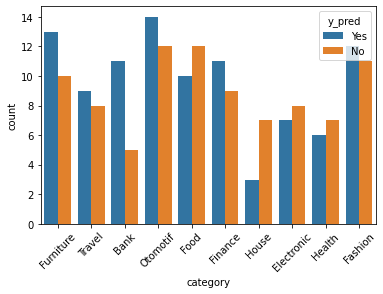

      category y_pred          %
0         Bank     No  31.250000
1         Bank    Yes  68.750000
2   Electronic     No  53.333333
3   Electronic    Yes  46.666667
4      Fashion     No  47.826087
5      Fashion    Yes  52.173913
6      Finance     No  45.000000
7      Finance    Yes  55.000000
8         Food     No  54.545455
9         Food    Yes  45.454545
10   Furniture     No  43.478261
11   Furniture    Yes  56.521739
12      Health     No  53.846154
13      Health    Yes  46.153846
14       House     No  70.000000
15       House    Yes  30.000000
16    Otomotif     No  46.153846
17    Otomotif    Yes  53.846154
18      Travel     No  47.058824
19      Travel    Yes  52.941176


In [376]:
a = 1
for col in cate:
  print("{}. {}".format(a, col))
  sns.countplot(data = correct_pred, x = col, hue= 'y_pred')
  plt.xticks(rotation= 45)
  plt.show()
  b = correct_pred.groupby([col, 'y_pred'])['y_pred'].count()
  c = pd.DataFrame(data = (b.div(correct_pred.groupby(col)[col].count()) * 100).reset_index(name= '%'))
  print(c)

  a += 1

Kesimpulan user yang diprediksi akan klik ads yang muncul memiliki dapat di deskripsikan sebagai berikut:
1. Daily time spent on site rata - rata adalah 52 menit/hari, dengan nilai q1 = 41 menit/hari, q2 = 50 menit/hari, dan q3 = 59 menit/hari
2. Area income rata - rata adalah IDR 337.000.000/tahun, dengan nilai q1 = IDR 276.000.000/tahun, q2 = IDR 337.000.000/tahun, q3 = IDR 408.000.000/tahun
3. Daily internet usage rata - rata adalah 130 Gb/hari, dengan nilai q1 = 120 Gb/hari, q2 = 135 Gb/hari, q3 = 153 Gb/hari
4. Kategori umur eldery (>= 45) memiliki presentase klik ads lebih besar dibandingkan teen age dan mid age yaitu 88.4 %
5. Gender perempuan memiliki presentase klik ads lebih besar dibandingkan laki - laki yaitu 54.3 %
6. Weekday memiliki presentase klik ads lebih besar dibandingkan weekend yaitu 52.6 %
7. Balikpapan dan Serang memiliki presentase klik ads 100 %, selain itu jakarta timur memiliki persentase klik ads 76.9 %
8. Provinsi Kalimantan Selatan memiliki persentase klik ads 75 %, diikuti dengan Banten 69.2 % dan Riau 62.5 %
9. Kategori bank memiliki persentase klik ads yang tinggi yaitu 68.7 % diikuti dengan Furniture 56.2 % dan Finance 55 %


# Bussines Recomendation and Simulation

In [377]:
correct_pred['y_pred'].value_counts()
conv_rate = (96/(96+89))*100
print("From data test the convertion rate is {}".format(round(conv_rate), 2))


From data test the convertion rate is 52


In [378]:
correct_pred.shape

(185, 11)